In [1]:
import pandas as pd
# Load training data frame
train_data_path = '../../dat/train.tsv'
train_df = pd.read_table(train_data_path)
print('Training DataFrame loaded')

Training DataFrame loaded


In [2]:
y = train_df['price']
import numpy as np
y = np.array(y)
y.shape


(1482535,)

In [3]:
print('Data shape:')
print(train_df.shape)

Data shape:
(1482535, 8)


In [4]:
print('Sample:')
#print(train_df.head(10))
#print(train_df.head())
#train_df.head()
train_df.head(10)

Sample:


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8,0,I realized his pants are on backwards after th...


In [5]:
print('Data colomns:')
for col in train_df.columns:
    print(col)

Data colomns:
train_id
name
item_condition_id
category_name
brand_name
price
shipping
item_description


In [6]:
print('Data types')
print(train_df.dtypes)

Data types
train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object


In [7]:
# Data statistics
print(train_df.describe())

             train_id  item_condition_id           price        shipping
count  1482535.000000     1482535.000000  1482535.000000  1482535.000000
mean    741267.000000           1.907380       26.737516        0.447274
std     427971.135004           0.903159       38.586066        0.497212
min          0.000000           1.000000        0.000000        0.000000
25%     370633.500000           1.000000       10.000000        0.000000
50%     741267.000000           2.000000       17.000000        0.000000
75%    1111900.500000           3.000000       29.000000        1.000000
max    1482534.000000           5.000000     2009.000000        1.000000


In [8]:
print('Drop train_id')
train_df = train_df.drop(['train_id'], axis=1)

Drop train_id


In [9]:
print('Missing values:\n' + str(len(train_df) - train_df.count()))

Missing values:
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64


Histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3f3ebcb10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe3f3d3ad10>]], dtype=object)

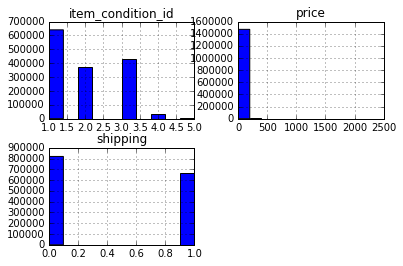

In [10]:
%matplotlib inline  
print('Histograms')
train_df.hist()

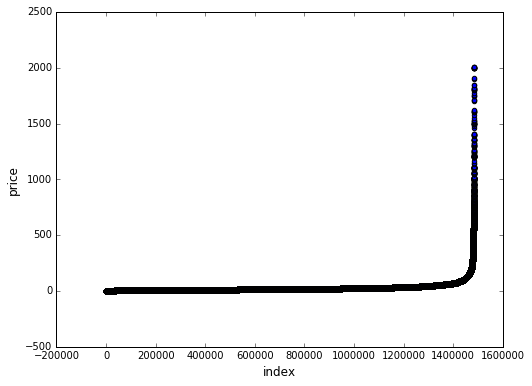

In [11]:
# Price outliers and scatter plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

No negative values, OK!
Let us remove the outliers and then do a histogram plot on the same.

In [12]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

/usr/lib/python2.7/dist-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


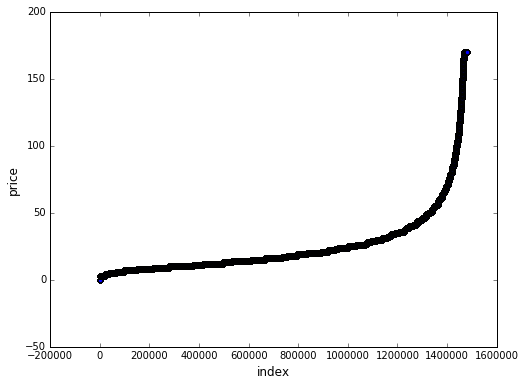

In [13]:
# After outlier removal:
# Price outliers and scatter plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

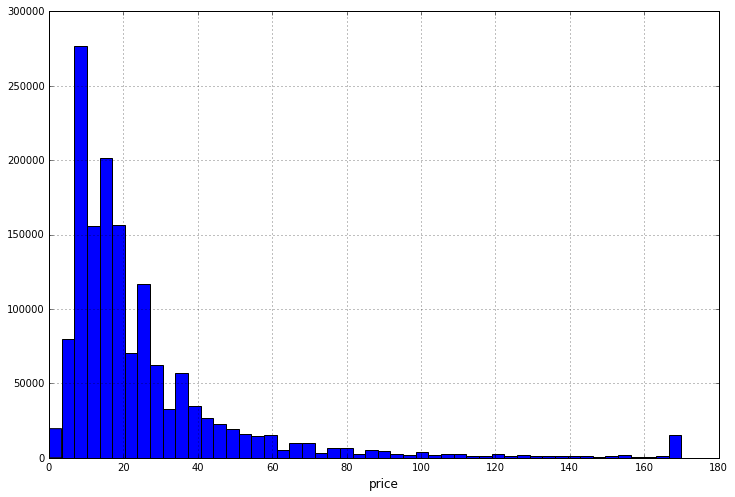

In [14]:
# Hist
plt.figure(figsize=(12,8))
#sns.distplot(train_df.price.values, bins=50, kde=False)
train_df.price.hist(bins=50)
plt.xlabel('price', fontsize=12)
plt.show()

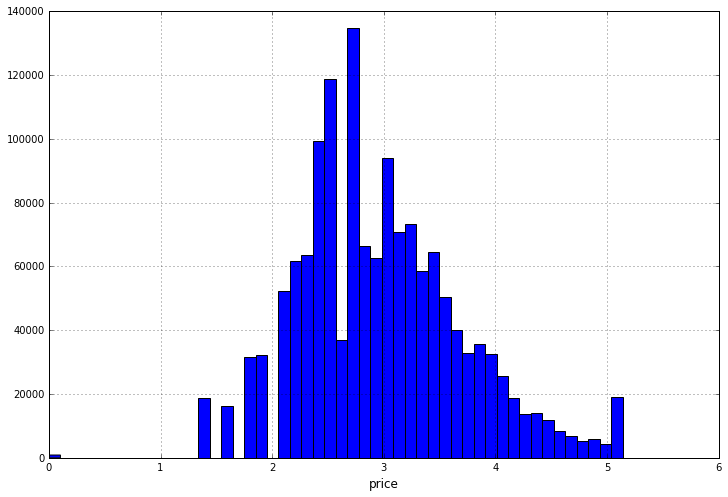

In [15]:
# Hist log(price)
import numpy as np
plt.figure(figsize=(12,8))
# log(price + 1) to avoid 0's
#sns.distplot(np.log(train_df.price + 1).values, bins=50, kde=False)
# Same as:
#sns.distplot(np.log(train_df['price'] + 1).values, bins=50, kde=False)
# Same as :
#np.log(train_df.price + 1).hist(bins=50)
# Same as:
np.log(train_df['price'] + 1).hist(bins=50)
plt.xlabel('price', fontsize=12)
plt.show()

In [16]:
# Number of unique categories
train_df.category_name.nunique()

1287

In [17]:
# Number of unique categories
train_df.category_name.value_counts()


Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Women/Dresses/Above Knee, Mini                                 20082
Women/Jewelry/Necklaces                                        19758
Women/Athletic Apparel/Shorts                                  19528
Beauty/Makeup/Makeup Palettes                                  19103
Women/Shoes/Boots                 

category_name
Beauty/Bath & Body/Bath                         Axes(0.125,0.125;0.775x0.775)
Beauty/Bath & Body/Bathing Accessories          Axes(0.125,0.125;0.775x0.775)
Beauty/Bath & Body/Cleansers                    Axes(0.125,0.125;0.775x0.775)
Beauty/Bath & Body/Other                        Axes(0.125,0.125;0.775x0.775)
Beauty/Bath & Body/Scrubs & Body Treatments     Axes(0.125,0.125;0.775x0.775)
Beauty/Bath & Body/Sets                         Axes(0.125,0.125;0.775x0.775)
Beauty/Fragrance/Candles & Home Scents          Axes(0.125,0.125;0.775x0.775)
Beauty/Fragrance/Kids                           Axes(0.125,0.125;0.775x0.775)
Beauty/Fragrance/Men                            Axes(0.125,0.125;0.775x0.775)
Beauty/Fragrance/Other                          Axes(0.125,0.125;0.775x0.775)
Beauty/Fragrance/Sets                           Axes(0.125,0.125;0.775x0.775)
Beauty/Fragrance/Women                          Axes(0.125,0.125;0.775x0.775)
Beauty/Hair Care/Conditioners                   Ax

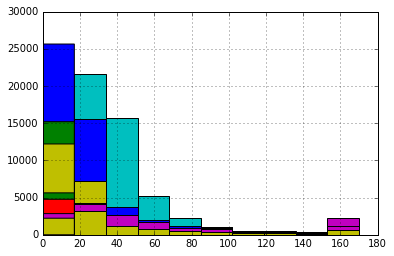

In [18]:
train_df.groupby('category_name').price.hist(bins=10, range=[0, 300], alpha=0.4)

In [20]:
categories = train_df.groupby('category_name')
# This is a GroupBy object, which needs to be iterated to get each DF of each group.
#print(len(cat_clusters))
print(categories.count())


                                               name  item_condition_id  \
category_name                                                            
Beauty/Bath & Body/Bath                        5049               5049   
Beauty/Bath & Body/Bathing Accessories          332                332   
Beauty/Bath & Body/Cleansers                    723                723   
Beauty/Bath & Body/Other                        147                147   
Beauty/Bath & Body/Scrubs & Body Treatments     812                812   
Beauty/Bath & Body/Sets                         695                695   
Beauty/Fragrance/Candles & Home Scents         2965               2965   
Beauty/Fragrance/Kids                            87                 87   
Beauty/Fragrance/Men                           2114               2114   
Beauty/Fragrance/Other                           39                 39   
Beauty/Fragrance/Sets                           461                461   
Beauty/Fragrance/Women                

In [21]:
print(categories.size())

category_name
Beauty/Bath & Body/Bath                          5049
Beauty/Bath & Body/Bathing Accessories            332
Beauty/Bath & Body/Cleansers                      723
Beauty/Bath & Body/Other                          147
Beauty/Bath & Body/Scrubs & Body Treatments       812
Beauty/Bath & Body/Sets                           695
Beauty/Fragrance/Candles & Home Scents           2965
Beauty/Fragrance/Kids                              87
Beauty/Fragrance/Men                             2114
Beauty/Fragrance/Other                             39
Beauty/Fragrance/Sets                             461
Beauty/Fragrance/Women                          18628
Beauty/Hair Care/Conditioners                     474
Beauty/Hair Care/Hair & Scalp Treatments         1254
Beauty/Hair Care/Hair Color                       631
Beauty/Hair Care/Hair Loss Products               125
Beauty/Hair Care/Hair Perms & Texturizers           5
Beauty/Hair Care/Hair Relaxers                      3
Beauty/Hair Ca

Beauty/Bath & Body/Bath
count    5049.000000
mean       18.376708
std        16.283879
min         0.000000
25%         9.000000
50%        14.000000
75%        22.000000
max       170.000000
Name: price, dtype: float64


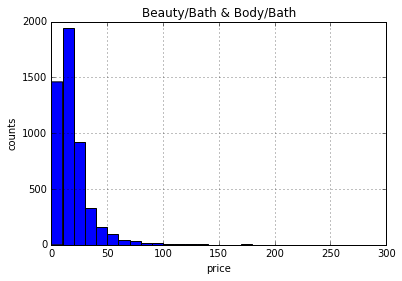

40
% Pure
count    2.000000
mean     5.500000
std      0.707107
min      5.000000
25%      5.250000
50%      5.500000
75%      5.750000
max      6.000000
Name: price, dtype: float64


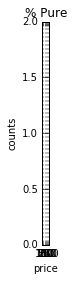

AERIN
count     1
mean     18
std     NaN
min      18
25%      18
50%      18
75%      18
max      18
Name: price, dtype: float64


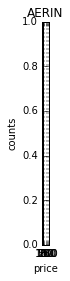

Arbonne
count     5.000000
mean     15.600000
std       7.503333
min       5.000000
25%      12.000000
50%      16.000000
75%      21.000000
max      24.000000
Name: price, dtype: float64


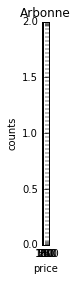

Aveda
count     1
mean     20
std     NaN
min      20
25%      20
50%      20
75%      20
max      20
Name: price, dtype: float64


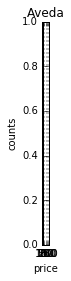

Avon
count    32.000000
mean     15.750000
std       9.023267
min       3.000000
25%       9.000000
50%      13.500000
75%      18.500000
max      38.000000
Name: price, dtype: float64


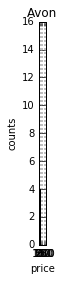

Bath & Body Works
count    981.000000
mean      16.229358
std       12.971531
min        0.000000
25%        9.000000
50%       13.000000
75%       20.000000
max      170.000000
Name: price, dtype: float64


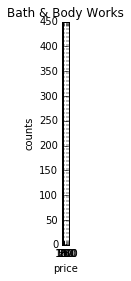

BeautiControl
count     1
mean      4
std     NaN
min       4
25%       4
50%       4
75%       4
max       4
Name: price, dtype: float64


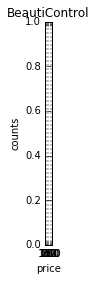

Benefit
count     2.000000
mean     12.500000
std       4.949747
min       9.000000
25%      10.750000
50%      12.500000
75%      14.250000
max      16.000000
Name: price, dtype: float64


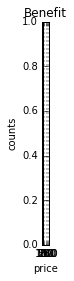

Better Shea Butter
count     1
mean     25
std     NaN
min      25
25%      25
50%      25
75%      25
max      25
Name: price, dtype: float64


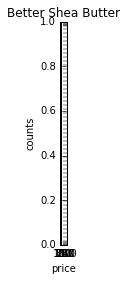

Chanel
count     4.000000
mean     32.250000
std      11.786291
min      24.000000
25%      24.000000
50%      28.000000
75%      36.250000
max      49.000000
Name: price, dtype: float64


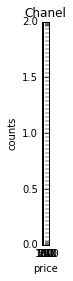

Conair
count     1
mean     33
std     NaN
min      33
25%      33
50%      33
75%      33
max      33
Name: price, dtype: float64


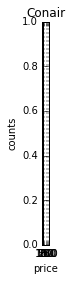

Disney
count     1
mean     15
std     NaN
min      15
25%      15
50%      15
75%      15
max      15
Name: price, dtype: float64


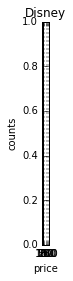

Dove
count     4.000000
mean     18.750000
std       8.920949
min       8.000000
25%      14.000000
50%      19.000000
75%      23.750000
max      29.000000
Name: price, dtype: float64


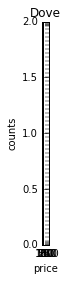

Estee Lauder
count     2.000000
mean     15.500000
std      10.606602
min       8.000000
25%      11.750000
50%      15.500000
75%      19.250000
max      23.000000
Name: price, dtype: float64


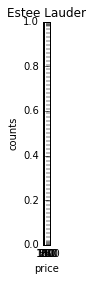

Garnier
count     1
mean     40
std     NaN
min      40
25%      40
50%      40
75%      40
max      40
Name: price, dtype: float64


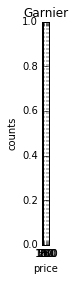

Hello Kitty
count     1
mean      7
std     NaN
min       7
25%       7
50%       7
75%       7
max       7
Name: price, dtype: float64


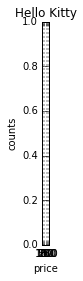

Irish Spring
count     1
mean     27
std     NaN
min      27
25%      27
50%      27
75%      27
max      27
Name: price, dtype: float64


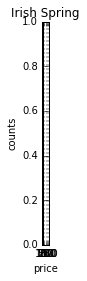

Jafra
count     1
mean     12
std     NaN
min      12
25%      12
50%      12
75%      12
max      12
Name: price, dtype: float64


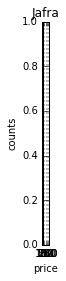

L'Oreal
count     1
mean      5
std     NaN
min       5
25%       5
50%       5
75%       5
max       5
Name: price, dtype: float64


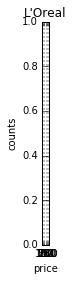

Laura Mercier
count     1
mean     30
std     NaN
min      30
25%      30
50%      30
75%      30
max      30
Name: price, dtype: float64


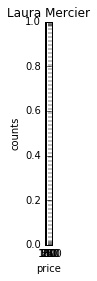

Lush
count    597.000000
mean      24.241206
std       18.612314
min        3.000000
25%       12.000000
50%       20.000000
75%       30.000000
max      170.000000
Name: price, dtype: float64


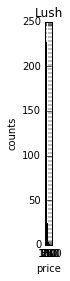

MAC
count     1
mean     18
std     NaN
min      18
25%      18
50%      18
75%      18
max      18
Name: price, dtype: float64


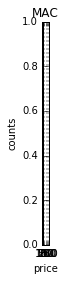

MARC JACOBS
count     1
mean     10
std     NaN
min      10
25%      10
50%      10
75%      10
max      10
Name: price, dtype: float64


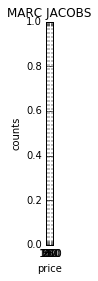

Mary Kay
count     8.00000
mean     15.37500
std      13.58505
min       7.00000
25%       7.75000
50%       9.00000
75%      18.00000
max      47.00000
Name: price, dtype: float64


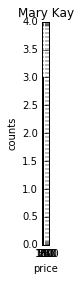

Neutrogena
count     4.000000
mean     14.750000
std       8.381527
min       7.000000
25%       7.750000
50%      15.000000
75%      22.000000
max      22.000000
Name: price, dtype: float64


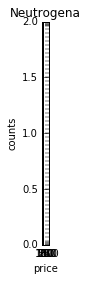

Nivea
count    13.000000
mean     17.153846
std       5.241599
min      10.000000
25%      13.000000
50%      17.000000
75%      20.000000
max      27.000000
Name: price, dtype: float64


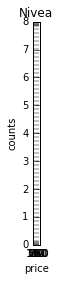

Nubian Heritage
count     1
mean     14
std     NaN
min      14
25%      14
50%      14
75%      14
max      14
Name: price, dtype: float64


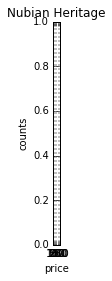

Olay
count    20.000000
mean     19.100000
std       7.559588
min       7.000000
25%      14.750000
50%      18.000000
75%      22.250000
max      34.000000
Name: price, dtype: float64


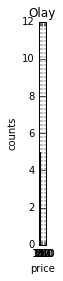

Paul Mitchell
count     1
mean     56
std     NaN
min      56
25%      56
50%      56
75%      56
max      56
Name: price, dtype: float64


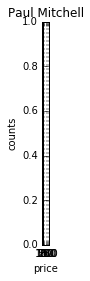

Revlon
count     1
mean     26
std     NaN
min      26
25%      26
50%      26
75%      26
max      26
Name: price, dtype: float64


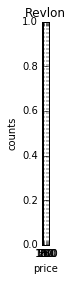

Schick
count     1
mean      5
std     NaN
min       5
25%       5
50%       5
75%       5
max       5
Name: price, dtype: float64


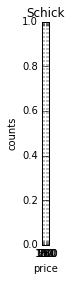

SeneGence
count     1
mean     14
std     NaN
min      14
25%      14
50%      14
75%      14
max      14
Name: price, dtype: float64


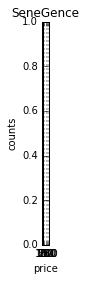

Sephora
count    45.000000
mean     15.822222
std       8.552748
min       5.000000
25%       9.000000
50%      12.000000
75%      20.000000
max      39.000000
Name: price, dtype: float64


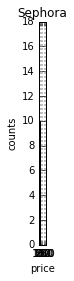

Shiseido
count     3.000000
mean     12.333333
std       3.511885
min       9.000000
25%      10.500000
50%      12.000000
75%      14.000000
max      16.000000
Name: price, dtype: float64


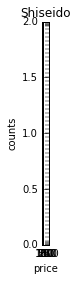

Slatkin & Co.
count     1
mean     21
std     NaN
min      21
25%      21
50%      21
75%      21
max      21
Name: price, dtype: float64


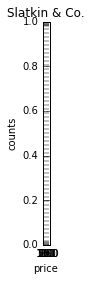

Suave
count     1
mean     15
std     NaN
min      15
25%      15
50%      15
75%      15
max      15
Name: price, dtype: float64


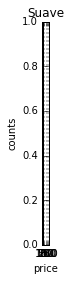

The Body Shop
count    18.000000
mean     13.222222
std       6.521959
min       3.000000
25%       7.500000
50%      14.500000
75%      18.750000
max      25.000000
Name: price, dtype: float64


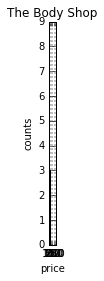

Tone
count     2.000000
mean     17.000000
std       7.071068
min      12.000000
25%      14.500000
50%      17.000000
75%      19.500000
max      22.000000
Name: price, dtype: float64


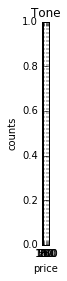

Ulta
count     9.000000
mean     13.333333
std       3.774917
min       8.000000
25%      11.000000
50%      13.000000
75%      15.000000
max      19.000000
Name: price, dtype: float64


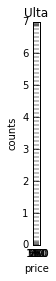

Victoria's Secret
count    100.000000
mean      16.980000
std       10.103485
min        5.000000
25%       10.000000
50%       13.000000
75%       22.000000
max       63.000000
Name: price, dtype: float64


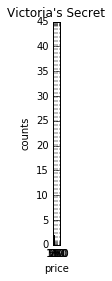

Beauty/Bath & Body/Bathing Accessories
count    332.000000
mean      21.882530
std       12.634822
min        3.000000
25%       12.000000
50%       20.000000
75%       29.000000
max       75.000000
Name: price, dtype: float64


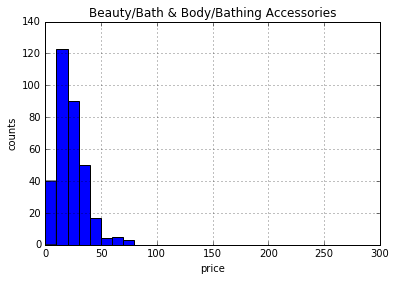

8
Bath & Body Works
count     5.000000
mean     24.600000
std      29.381967
min       4.000000
25%       9.000000
50%       9.000000
75%      26.000000
max      75.000000
Name: price, dtype: float64


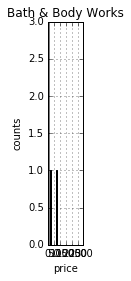

Hello Kitty
count    2.000000
mean     6.500000
std      3.535534
min      4.000000
25%      5.250000
50%      6.500000
75%      7.750000
max      9.000000
Name: price, dtype: float64


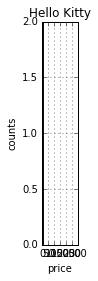

Lush
count     9.000000
mean     15.111111
std       7.025746
min       8.000000
25%      10.000000
50%      12.000000
75%      20.000000
max      26.000000
Name: price, dtype: float64


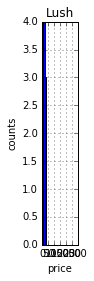

Olay
count     1
mean     16
std     NaN
min      16
25%      16
50%      16
75%      16
max      16
Name: price, dtype: float64


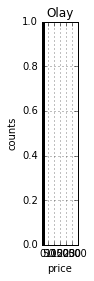

PINK
count     1
mean     31
std     NaN
min      31
25%      31
50%      31
75%      31
max      31
Name: price, dtype: float64


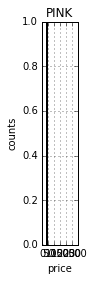

Sephora
count     1
mean     20
std     NaN
min      20
25%      20
50%      20
75%      20
max      20
Name: price, dtype: float64


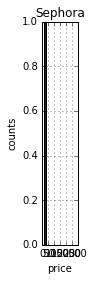

Ulta
count     9.000000
mean     12.333333
std       3.905125
min       7.000000
25%      10.000000
50%      12.000000
75%      14.000000
max      20.000000
Name: price, dtype: float64


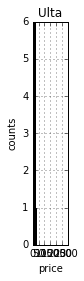

Victoria's Secret
count    158.000000
mean      28.689873
std       11.396112
min        6.000000
25%       21.000000
50%       28.000000
75%       34.000000
max       74.000000
Name: price, dtype: float64


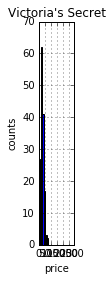

Beauty/Bath & Body/Cleansers
count    723.000000
mean      13.510373
std       12.638741
min        3.000000
25%        7.000000
50%       10.000000
75%       16.000000
max      170.000000
Name: price, dtype: float64


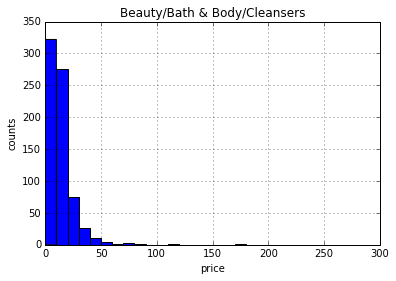

17
Aveda
count     1
mean     20
std     NaN
min      20
25%      20
50%      20
75%      20
max      20
Name: price, dtype: float64


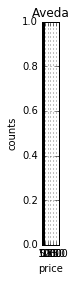

Bath & Body Works
count    456.000000
mean      11.771930
std       12.219268
min        3.000000
25%        6.000000
50%        9.000000
75%       14.000000
max      170.000000
Name: price, dtype: float64


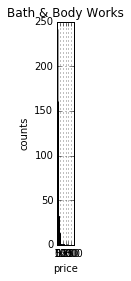

BeautiControl
count     1
mean     16
std     NaN
min      16
25%      16
50%      16
75%      16
max      16
Name: price, dtype: float64


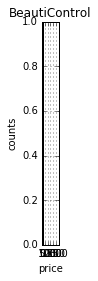

Clinique
count     1
mean     31
std     NaN
min      31
25%      31
50%      31
75%      31
max      31
Name: price, dtype: float64


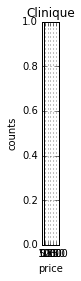

Dermablend
count     1
mean     29
std     NaN
min      29
25%      29
50%      29
75%      29
max      29
Name: price, dtype: float64


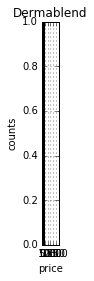

Kiehl's
count     3.000000
mean     16.666667
std       4.509250
min      12.000000
25%      14.500000
50%      17.000000
75%      19.000000
max      21.000000
Name: price, dtype: float64


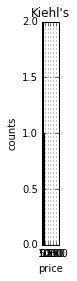

Lush
count     4.000000
mean     20.250000
std       6.946222
min      10.000000
25%      19.000000
50%      23.000000
75%      24.250000
max      25.000000
Name: price, dtype: float64


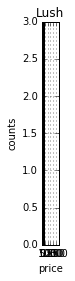

MAC
count     1
mean     11
std     NaN
min      11
25%      11
50%      11
75%      11
max      11
Name: price, dtype: float64


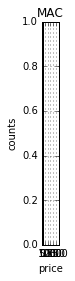

Mary Kay
count     1
mean     14
std     NaN
min      14
25%      14
50%      14
75%      14
max      14
Name: price, dtype: float64


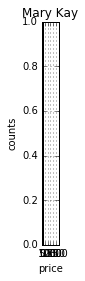

Neutrogena
count     1
mean     12
std     NaN
min      12
25%      12
50%      12
75%      12
max      12
Name: price, dtype: float64


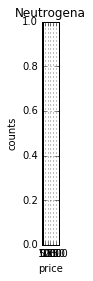

Nivea
count     1
mean     11
std     NaN
min      11
25%      11
50%      11
75%      11
max      11
Name: price, dtype: float64


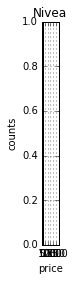

Olay
count     3.000000
mean     28.000000
std      20.297783
min      10.000000
25%      17.000000
50%      24.000000
75%      37.000000
max      50.000000
Name: price, dtype: float64


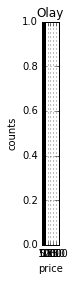

Origins
count     1
mean     33
std     NaN
min      33
25%      33
50%      33
75%      33
max      33
Name: price, dtype: float64


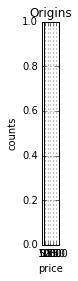

Physicians Formula
count     1
mean     31
std     NaN
min      31
25%      31
50%      31
75%      31
max      31
Name: price, dtype: float64


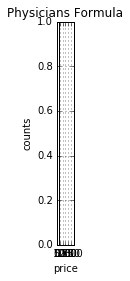

Sephora
count     7.000000
mean     35.142857
std      26.333936
min       9.000000
25%      15.000000
50%      35.000000
75%      44.000000
max      84.000000
Name: price, dtype: float64


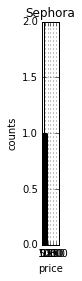

Victoria's Secret
count    10.000000
mean     13.600000
std       7.058486
min       5.000000
25%      10.000000
50%      13.000000
75%      14.000000
max      27.000000
Name: price, dtype: float64


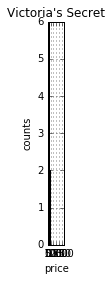

e.l.f.
count     1
mean     15
std     NaN
min      15
25%      15
50%      15
75%      15
max      15
Name: price, dtype: float64


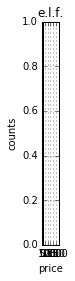

Beauty/Bath & Body/Other
count    147.000000
mean      20.469388
std       19.923933
min        3.000000
25%        9.000000
50%       16.000000
75%       25.000000
max      168.000000
Name: price, dtype: float64


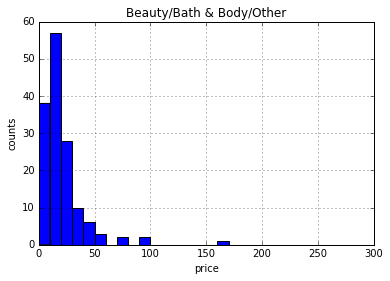

6
Bath & Body Works
count     26.000000
mean      20.115385
std       31.451966
min        3.000000
25%        8.250000
50%       14.000000
75%       17.750000
max      168.000000
Name: price, dtype: float64


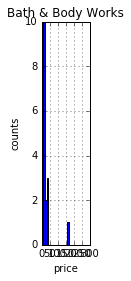

Lush
count     3.000000
mean      9.333333
std       0.577350
min       9.000000
25%       9.000000
50%       9.000000
75%       9.500000
max      10.000000
Name: price, dtype: float64


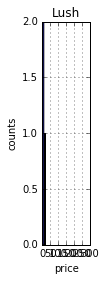

MAC
count     1
mean     75
std     NaN
min      75
25%      75
50%      75
75%      75
max      75
Name: price, dtype: float64


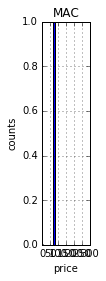

Sephora
count     3.000000
mean     14.000000
std       5.567764
min       8.000000
25%      11.500000
50%      15.000000
75%      17.000000
max      19.000000
Name: price, dtype: float64


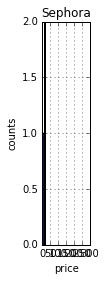

Victoria's Secret
count    13.000000
mean     18.000000
std      12.903488
min       5.000000
25%      10.000000
50%      15.000000
75%      19.000000
max      55.000000
Name: price, dtype: float64


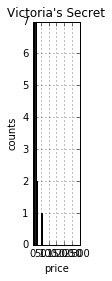

Younique
count     1
mean     14
std     NaN
min      14
25%      14
50%      14
75%      14
max      14
Name: price, dtype: float64


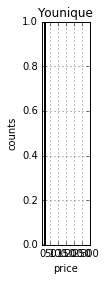

Beauty/Bath & Body/Scrubs & Body Treatments
count    812.000000
mean      24.603448
std       21.428582
min        3.000000
25%       12.000000
50%       18.000000
75%       29.250000
max      170.000000
Name: price, dtype: float64


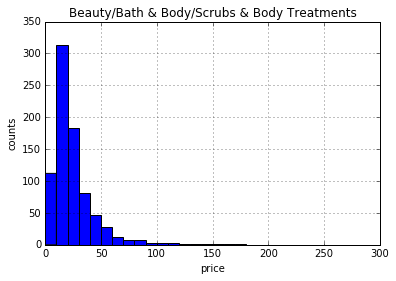

20
% Pure
count     2.000000
mean      9.500000
std       0.707107
min       9.000000
25%       9.250000
50%       9.500000
75%       9.750000
max      10.000000
Name: price, dtype: float64


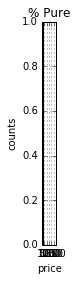

Arbonne
count     2.000000
mean     20.000000
std      11.313708
min      12.000000
25%      16.000000
50%      20.000000
75%      24.000000
max      28.000000
Name: price, dtype: float64


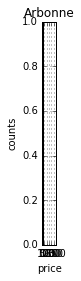

Avon
count     2.000000
mean      8.000000
std       2.828427
min       6.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      10.000000
Name: price, dtype: float64


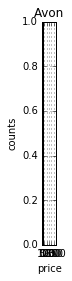

Bath & Body Works
count    44.000000
mean     15.954545
std       9.873513
min       6.000000
25%      10.000000
50%      12.500000
75%      18.500000
max      56.000000
Name: price, dtype: float64


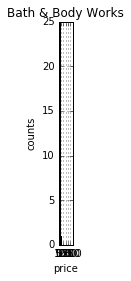

Burt's Bees
count     2.000000
mean     10.000000
std       2.828427
min       8.000000
25%       9.000000
50%      10.000000
75%      11.000000
max      12.000000
Name: price, dtype: float64


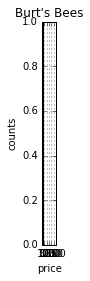

Clarins
count     1
mean     13
std     NaN
min      13
25%      13
50%      13
75%      13
max      13
Name: price, dtype: float64


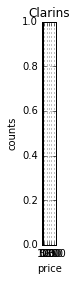

Hello Kitty
count     1
mean      7
std     NaN
min       7
25%       7
50%       7
75%       7
max       7
Name: price, dtype: float64


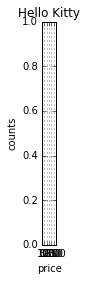

Laura Mercier
count     1
mean     18
std     NaN
min      18
25%      18
50%      18
75%      18
max      18
Name: price, dtype: float64


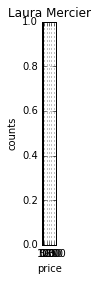

Lush
count    15.000000
mean     20.800000
std      12.096044
min       8.000000
25%      14.000000
50%      17.000000
75%      25.000000
max      56.000000
Name: price, dtype: float64


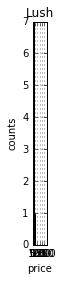

Mary Kay
count     2.000000
mean     16.000000
std      15.556349
min       5.000000
25%      10.500000
50%      16.000000
75%      21.500000
max      27.000000
Name: price, dtype: float64


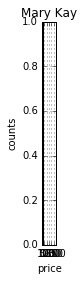

Neutrogena
count     3.000000
mean     11.000000
std       2.645751
min       9.000000
25%       9.500000
50%      10.000000
75%      12.000000
max      14.000000
Name: price, dtype: float64


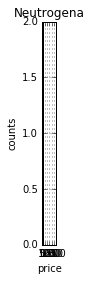

Origins
count     1
mean      7
std     NaN
min       7
25%       7
50%       7
75%       7
max       7
Name: price, dtype: float64


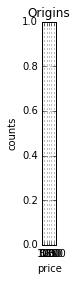

SeneGence
count     2.000000
mean     66.000000
std      33.941125
min      42.000000
25%      54.000000
50%      66.000000
75%      78.000000
max      90.000000
Name: price, dtype: float64


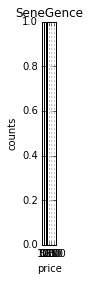

Sephora
count    14.000000
mean     14.857143
std       5.404516
min       9.000000
25%      12.000000
50%      13.000000
75%      16.000000
max      30.000000
Name: price, dtype: float64


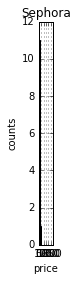

Suave
count     1
mean     17
std     NaN
min      17
25%      17
50%      17
75%      17
max      17
Name: price, dtype: float64


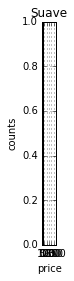

The Body Shop
count     3.000000
mean      9.333333
std       5.859465
min       5.000000
25%       6.000000
50%       7.000000
75%      11.500000
max      16.000000
Name: price, dtype: float64


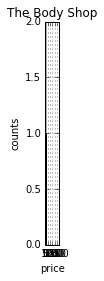

Ulta
count     6.000000
mean     14.833333
std       5.810909
min       8.000000
25%      12.000000
50%      14.000000
75%      16.000000
max      25.000000
Name: price, dtype: float64


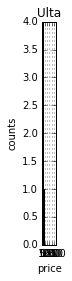

Victoria's Secret
count    29.000000
mean     19.724138
std      11.768288
min       6.000000
25%      11.000000
50%      15.000000
75%      26.000000
max      51.000000
Name: price, dtype: float64


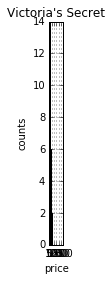

Younique
count     1
mean      9
std     NaN
min       9
25%       9
50%       9
75%       9
max       9
Name: price, dtype: float64


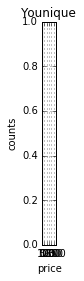

bareMinerals
count     1
mean     20
std     NaN
min      20
25%      20
50%      20
75%      20
max      20
Name: price, dtype: float64


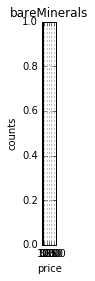

Beauty/Bath & Body/Sets
count    695.000000
mean      20.956835
std       15.841465
min        3.000000
25%       12.000000
50%       17.000000
75%       24.000000
max      170.000000
Name: price, dtype: float64


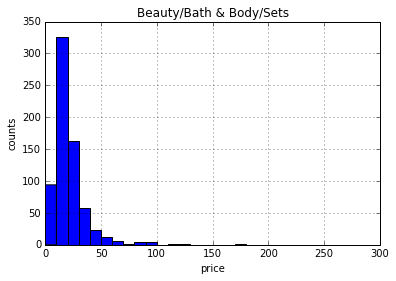

17
Aveda
count     2.000000
mean     17.000000
std       4.242641
min      14.000000
25%      15.500000
50%      17.000000
75%      18.500000
max      20.000000
Name: price, dtype: float64


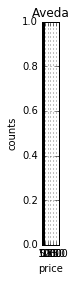

Avon
count     5.000000
mean     14.400000
std       5.549775
min       6.000000
25%      12.000000
50%      16.000000
75%      18.000000
max      20.000000
Name: price, dtype: float64


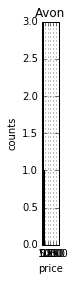

Bath & Body Works
count    452.000000
mean      20.504425
std       12.473208
min        4.000000
25%       12.000000
50%       18.000000
75%       24.000000
max       91.000000
Name: price, dtype: float64


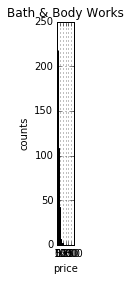

Burt's Bees
count     1
mean     12
std     NaN
min      12
25%      12
50%      12
75%      12
max      12
Name: price, dtype: float64


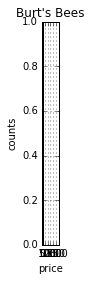

Chanel
count     1
mean     25
std     NaN
min      25
25%      25
50%      25
75%      25
max      25
Name: price, dtype: float64


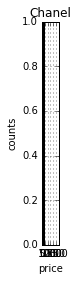

Clinique
count     1
mean     13
std     NaN
min      13
25%      13
50%      13
75%      13
max      13
Name: price, dtype: float64


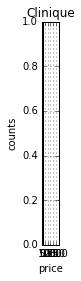

Hello Kitty
count     1
mean     30
std     NaN
min      30
25%      30
50%      30
75%      30
max      30
Name: price, dtype: float64


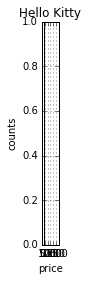

Lancome
count     1
mean     18
std     NaN
min      18
25%      18
50%      18
75%      18
max      18
Name: price, dtype: float64


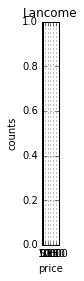

MARC JACOBS
count     1
mean     13
std     NaN
min      13
25%      13
50%      13
75%      13
max      13
Name: price, dtype: float64


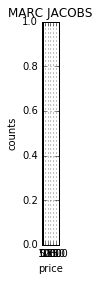

NYX
count     1
mean     22
std     NaN
min      22
25%      22
50%      22
75%      22
max      22
Name: price, dtype: float64


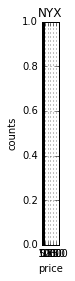

Olay
count     1
mean     18
std     NaN
min      18
25%      18
50%      18
75%      18
max      18
Name: price, dtype: float64


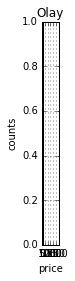

Origins
count     1
mean     18
std     NaN
min      18
25%      18
50%      18
75%      18
max      18
Name: price, dtype: float64


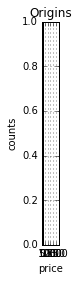

PINK
count     1
mean     31
std     NaN
min      31
25%      31
50%      31
75%      31
max      31
Name: price, dtype: float64


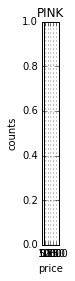

Sephora
count     6.000000
mean     13.000000
std       3.464102
min       9.000000
25%       9.750000
50%      14.000000
75%      16.000000
max      16.000000
Name: price, dtype: float64


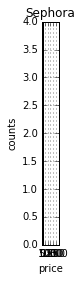

The Body Shop
count     3.000000
mean     13.666667
std       7.371115
min       8.000000
25%       9.500000
50%      11.000000
75%      16.500000
max      22.000000
Name: price, dtype: float64


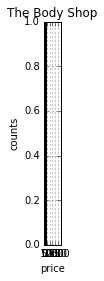

Victoria's Secret
count    71.000000
mean     24.140845
std      13.706407
min       3.000000
25%      15.500000
50%      20.000000
75%      29.000000
max      93.000000
Name: price, dtype: float64


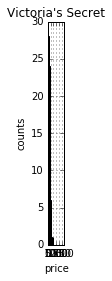

eos
count     3.000000
mean      9.666667
std       1.154701
min       9.000000
25%       9.000000
50%       9.000000
75%      10.000000
max      11.000000
Name: price, dtype: float64


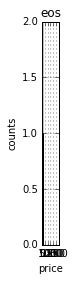

Beauty/Fragrance/Candles & Home Scents
count    2965.000000
mean       21.050253
std        16.216292
min         0.000000
25%        11.000000
50%        18.000000
75%        26.000000
max       170.000000
Name: price, dtype: float64


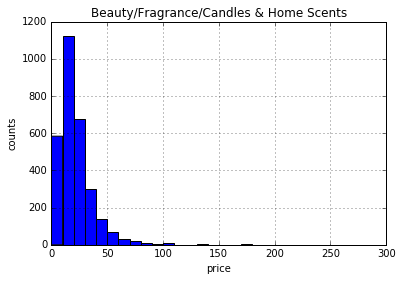

18
% Pure
count    2
mean     8
std      0
min      8
25%      8
50%      8
75%      8
max      8
Name: price, dtype: float64


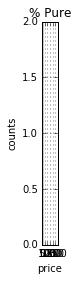

Air Wick
count     1
mean      3
std     NaN
min       3
25%       3
50%       3
75%       3
max       3
Name: price, dtype: float64


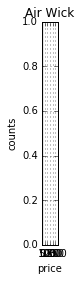

As Seen on TV
count     1
mean     16
std     NaN
min      16
25%      16
50%      16
75%      16
max      16
Name: price, dtype: float64


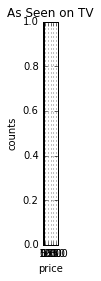

Aveda
count     1
mean     39
std     NaN
min      39
25%      39
50%      39
75%      39
max      39
Name: price, dtype: float64


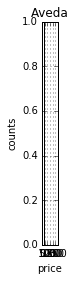

Avon
count     1
mean     20
std     NaN
min      20
25%      20
50%      20
75%      20
max      20
Name: price, dtype: float64


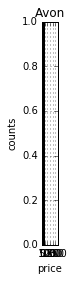

Bath & Body Works
count    1427.000000
mean       24.112824
std        16.994324
min         0.000000
25%        14.000000
50%        19.000000
75%        30.000000
max       170.000000
Name: price, dtype: float64


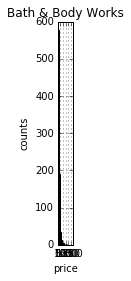

Burt's Bees
count     2.000000
mean      9.500000
std       9.192388
min       3.000000
25%       6.250000
50%       9.500000
75%      12.750000
max      16.000000
Name: price, dtype: float64


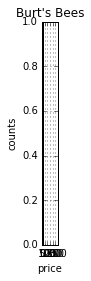

California Scents
count     2.000000
mean     18.500000
std      13.435029
min       9.000000
25%      13.750000
50%      18.500000
75%      23.250000
max      28.000000
Name: price, dtype: float64


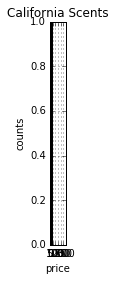

Chanel
count     1
mean     28
std     NaN
min      28
25%      28
50%      28
75%      28
max      28
Name: price, dtype: float64


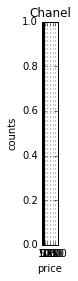

Lush
count     1
mean     26
std     NaN
min      26
25%      26
50%      26
75%      26
max      26
Name: price, dtype: float64


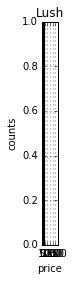

Nostalgia
count     1
mean     20
std     NaN
min      20
25%      20
50%      20
75%      20
max      20
Name: price, dtype: float64


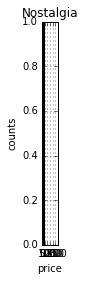

Scentsy
count     5.00000
mean     11.20000
std       3.49285
min       7.00000
25%       9.00000
50%      11.00000
75%      13.00000
max      16.00000
Name: price, dtype: float64


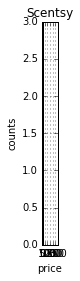

Sephora
count     2.000000
mean     31.000000
std       9.899495
min      24.000000
25%      27.500000
50%      31.000000
75%      34.500000
max      38.000000
Name: price, dtype: float64


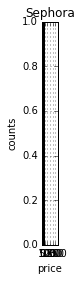

Sophia
count     1
mean     16
std     NaN
min      16
25%      16
50%      16
75%      16
max      16
Name: price, dtype: float64


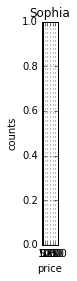

The Body Shop
count     2.000000
mean     24.000000
std       2.828427
min      22.000000
25%      23.000000
50%      24.000000
75%      25.000000
max      26.000000
Name: price, dtype: float64


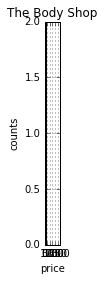

Victoria's Secret
count    11.000000
mean     20.181818
std      11.965101
min      11.000000
25%      14.000000
50%      15.000000
75%      19.000000
max      50.000000
Name: price, dtype: float64


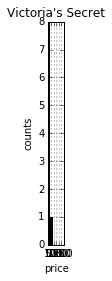

Yankee Candle
count     3.000000
mean     14.666667
std       5.773503
min       8.000000
25%      13.000000
50%      18.000000
75%      18.000000
max      18.000000
Name: price, dtype: float64


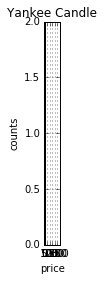

Yankee Candle Company
count     1
mean     20
std     NaN
min      20
25%      20
50%      20
75%      20
max      20
Name: price, dtype: float64


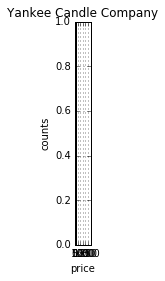

Beauty/Fragrance/Kids
count    87.000000
mean      8.379310
std       4.235073
min       3.000000
25%       4.500000
50%       8.000000
75%      11.000000
max      21.000000
Name: price, dtype: float64


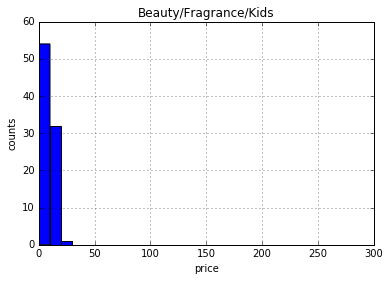

4
% Pure
count     2.000000
mean      8.000000
std       4.242641
min       5.000000
25%       6.500000
50%       8.000000
75%       9.500000
max      11.000000
Name: price, dtype: float64


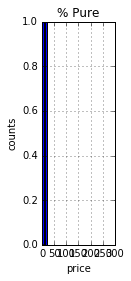

Jafra
count    11.000000
mean     13.272727
std       2.723634
min      10.000000
25%      10.500000
50%      14.000000
75%      15.500000
max      17.000000
Name: price, dtype: float64


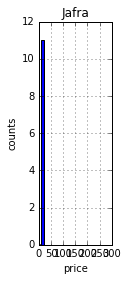

Slime®
count     1
mean      4
std     NaN
min       4
25%       4
50%       4
75%       4
max       4
Name: price, dtype: float64


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 5: ordinal not in range(128)

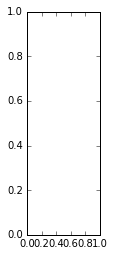

In [26]:
# Filter prices per each category name
import matplotlib.pyplot as plt
%matplotlib inline
for name, category in categories:
    print(name)
    
    # Stats about every category price
    print(category.price.describe())    

    fig=plt.figure()
    plt.title(name)
    plt.xlabel('price')
    plt.ylabel('counts')
    category['price'].hist(bins=30, range=[0, 300])
    plt.show()
    
    
    # Cluster each group by brand name
    brands = category.groupby('brand_name') 
    nbrands = len(brands)
    print(nbrands)
    # For each brand in the caegory, describe and hist
    col = 1
    for name, brand in brands:
        print(name)
        print(brand['price'].describe())
        
        plt.subplot(1, nbrands, col)
        plt.title(name)
        plt.xlabel('price')
        plt.ylabel('counts')
        brand['price'].hist(bins=30, range=[0, 300])
        #fig.tight_layout()  # Improves appearance a bit.        
        col += 1
        plt.show()



In [27]:
# Cluster by item_condition and hist the price
train_df.brand_name.value_counts()


PINK                    54088
Nike                    54043
Victoria's Secret       48036
LuLaRoe                 31024
Apple                   17322
FOREVER 21              15186
Nintendo                15007
Lululemon               14558
Michael Kors            13928
American Eagle          13254
Rae Dunn                12305
Sephora                 12172
Coach                   10463
Disney                  10360
Bath & Body Works       10354
Adidas                  10202
Funko                    9237
Under Armour             8461
Sony                     7994
Old Navy                 7567
Hollister                6948
Carter's                 6385
Urban Decay              6210
The North Face           6172
Independent              5902
Too Faced                5794
Xbox                     5709
Brandy Melville          5680
Kate Spade               5411
MAC                      5302
                        ...  
Sangean                     1
Coed Sportwear              1
Melissa Od

brand_name
!iT Jeans                Axes(0.125,0.125;0.775x0.775)
% Pure                   Axes(0.125,0.125;0.775x0.775)
10.Deep                  Axes(0.125,0.125;0.775x0.775)
191 Unlimited            Axes(0.125,0.125;0.775x0.775)
1byone                   Axes(0.125,0.125;0.775x0.775)
21men                    Axes(0.125,0.125;0.775x0.775)
24/7 Comfort Apparel     Axes(0.125,0.125;0.775x0.775)
2K Games                 Axes(0.125,0.125;0.775x0.775)
2XU                      Axes(0.125,0.125;0.775x0.775)
3.1 Phillip Lim          Axes(0.125,0.125;0.775x0.775)
3M®                      Axes(0.125,0.125;0.775x0.775)
47                       Axes(0.125,0.125;0.775x0.775)
47 Brand                 Axes(0.125,0.125;0.775x0.775)
5.11 Tactical            Axes(0.125,0.125;0.775x0.775)
525 America              Axes(0.125,0.125;0.775x0.775)
5th & Ocean              Axes(0.125,0.125;0.775x0.775)
7 Diamonds               Axes(0.125,0.125;0.775x0.775)
7 For All Mankind®       Axes(0.125,0.125;0.775x0.775)

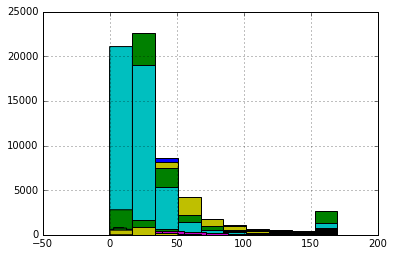

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
train_df.groupby('brand_name').price.hist(bins=10, range=[0, 300], alpha=0.4)

In [29]:
# Cluster by item_condition and hist the price
train_df.item_condition_id.value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

item_condition_id
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
Name: price, dtype: object

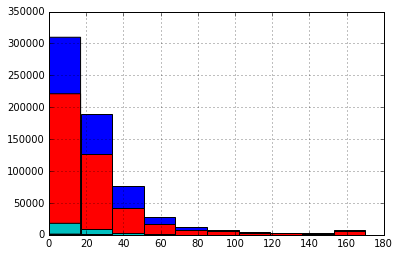

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
train_df.groupby('item_condition_id').price.hist(bins=10, range=[0, 300], alpha=0.4)

In [31]:
# Cluster by shipping and hist the price
train_df.shipping.value_counts()


0    819435
1    663100
Name: shipping, dtype: int64

shipping
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: price, dtype: object

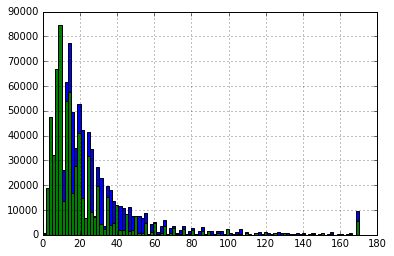

In [32]:


import matplotlib.pyplot as plt
%matplotlib inline
train_df.groupby('shipping').price.hist(bins=100, range=[0, 300], alpha=0.9)


# Correlation with each colomn variable with the target variable (price):

In [33]:
# Features correlations
corr = train_df.corr()
print(train_df.corr())

                   item_condition_id     price  shipping
item_condition_id           1.000000 -0.009025 -0.191154
price                      -0.009025  1.000000 -0.137145
shipping                   -0.191154 -0.137145  1.000000


In [34]:
import seaborn as sns
sns.heatmap(corr)

ImportError: No module named seaborn

In [ ]:
# Load test
test_data_path = '..\\dat\\test.tsv'
test_df = pd.read_table(test_data_path)
print('Test DataFrame loaded')

In [ ]:
print('Data shape:')
print(test_df.shape)


In [ ]:
print('Test Data colomns:')
colomns = test_df.keys()
print(colomns)


In [ ]:
print('Drop test_id')
test_df = test_df.drop(['test_id'], axis=1)

In [ ]:
print('Data types')
print(test_df.dtypes.head())

In [ ]:
print('Sample:')
print(test_df.head(10))

In [ ]:
# Data statistics
print(test_df.describe())

In [ ]:
print('Missing values:\n' + str(len(test_df) - test_df.count()))